# HEART DISEASSE DETECTION

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import zscore



import warnings
warnings.filterwarnings("ignore") 

## Read dataset

In [3]:
data_set = pd.read_csv('heart_all.csv')
data_set

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


## Exploring data

In [4]:
data_set.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## Remove nulls if exist

In [6]:
data_set.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
data_set.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [8]:
data_set.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [9]:
data_set.describe(exclude=[np.number])

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


## Remove duplicates if exists

In [10]:
data_set.duplicated().sum()

18078

In [11]:
data_set = data_set.drop_duplicates()

In [12]:
data_set.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [13]:
data_set['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [14]:
data_set['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

## Replace strings with numirical logical values

In [15]:
data_set["Sex"] = data_set["Sex"].replace({"Male": 1, "Female": 0})
columns_to_convert = ["HeartDisease", "Smoking", "AlcoholDrinking", "DiffWalking", "Diabetic", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer", "Stroke"]
for column in columns_to_convert:
    data_set[column] = data_set[column].replace({"Yes": 1, "No": 0, "No, borderline diabetes": 0 ,"Yes (during pregnancy)": 1})
data_set['GenHealth'] = data_set['GenHealth'].replace({"Excellent": 5, "Very good": 4, "Good": 3, "Fair": 2,"Poor":1 })
def convert_age_range_to_mean(age):
    if isinstance(age, int):
        return float(age)
    
    if '-' in age:
        age_min, age_max = age.split('-')
        return (float(age_min) + float(age_max)) / 2
    
    if ' or older' in age:
        age_min = age.replace(' or older', '')
        return (float(age_min) + float(age_min) + 10) / 2      
    return float(age)

data_set["AgeCategory"] = data_set["AgeCategory"].apply(convert_age_range_to_mean)
data_set.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,57.0,White,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,85.0,White,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,67.0,White,1,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,77.0,White,0,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,42.0,White,0,1,4,8.0,0,0,0


##### extract features with datatype = object

In [16]:
#label=LabelEncoder()

#columns_to_encode = ['HeartDisease', 'Smoking', 'AlcoholDrinking','Stroke','DiffWalking'
#                  ,'PhysicalActivity','Asthma','KidneyDisease','SkinCancer']

#for col in columns_to_encode:
#    data_set[col] = label.fit_transform(data_set[col])

# Now 'data_set' contains the label-encoded values for the selected columns

#data_set 

In [17]:
data_set2=data_set.copy()

In [18]:
data_set = pd.get_dummies(data_set,columns=['Sex', 'Race', 'Diabetic', 'GenHealth' ]
    , prefix = [ 'Sex','Race', 'Diabetic', 'GenHealth'])
columns_to_convert = ["Race_Hispanic", "Race_Other", "Race_White","Race_Black", "Race_American Indian/Alaskan Native", "Diabetic_0", "Diabetic_1", "GenHealth_1", "GenHealth_2", "GenHealth_3", "GenHealth_4", "GenHealth_5",
                      "Sex_0", "Sex_1"]
for column in columns_to_convert:
    data_set[column] = data_set[column].replace({True: 1, False: 0})

In [19]:
data_set

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,PhysicalActivity,...,Race_Hispanic,Race_Other,Race_White,Diabetic_0,Diabetic_1,GenHealth_1,GenHealth_2,GenHealth_3,GenHealth_4,GenHealth_5
0,0,16.60,1,0,0,3.0,30.0,0,57.0,1,...,0,0,1,0,1,0,0,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,85.0,1,...,0,0,1,1,0,0,0,0,1,0
2,0,26.58,1,0,0,20.0,30.0,0,67.0,1,...,0,0,1,0,1,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,77.0,0,...,0,0,1,1,0,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,42.0,1,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,62.0,0,...,1,0,0,0,1,0,1,0,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,37.0,1,...,1,0,0,1,0,0,0,0,1,0
319792,0,24.24,0,0,0,0.0,0.0,0,47.0,1,...,1,0,0,1,0,0,0,1,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,27.0,0,...,1,0,0,1,0,0,0,1,0,0


In [20]:
X = data_set.drop('HeartDisease', axis=1)
y = data_set['HeartDisease']

In [21]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [22]:
data_set = pd.concat([X_resampled, y_resampled], axis="columns")
data_set.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,PhysicalActivity,SleepTime,...,Race_Other,Race_White,Diabetic_0,Diabetic_1,GenHealth_1,GenHealth_2,GenHealth_3,GenHealth_4,GenHealth_5,HeartDisease
311481,29.95,0,1,0,2.0,0.0,0,85.0,1,6.0,...,0,1,1,0,0,0,0,1,0,0
171098,25.84,0,0,0,2.0,0.0,0,21.0,0,8.0,...,0,0,1,0,0,0,1,0,0,0
151394,34.02,1,0,0,1.0,0.0,0,57.0,1,7.0,...,0,0,1,0,0,0,1,0,0,0
240390,22.96,1,0,0,0.0,0.0,0,67.0,0,7.0,...,0,1,1,0,0,0,1,0,0,0
159498,24.21,0,0,0,0.0,20.0,0,21.0,1,7.0,...,0,1,1,0,0,0,0,1,0,0


In [23]:
# # replacing code here
# data_set["Sex"] = data_set["Sex"].replace({"Male": 1, "Female": 0})
# columns_to_convert = ["HeartDisease", "Smoking", "AlcoholDrinking", "DiffWalking", "Diabetic", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer", "Stroke"]
# for column in columns_to_convert:
#     data_set[column] = data_set[column].replace({"Yes": 1, "No": 0})
# data_set["Male"] = data_set["Sex"]
# data_set["Female"] = 1 - data_set["Sex"]
# data_set = data_set.drop(columns=["Sex", "Race"])
# data_set['GenHealth'] = data_set['GenHealth'].replace({"Excellent": 5, "Very good": 4, "Good": 3, "Fair": 2,"Poor":1 })
# data_set.head()

In [24]:
data_set

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,PhysicalActivity,SleepTime,...,Race_Other,Race_White,Diabetic_0,Diabetic_1,GenHealth_1,GenHealth_2,GenHealth_3,GenHealth_4,GenHealth_5,HeartDisease
311481,29.95,0,1,0,2.0,0.0,0,85.0,1,6.0,...,0,1,1,0,0,0,0,1,0,0
171098,25.84,0,0,0,2.0,0.0,0,21.0,0,8.0,...,0,0,1,0,0,0,1,0,0,0
151394,34.02,1,0,0,1.0,0.0,0,57.0,1,7.0,...,0,0,1,0,0,0,1,0,0,0
240390,22.96,1,0,0,0.0,0.0,0,67.0,0,7.0,...,0,1,1,0,0,0,1,0,0,0
159498,24.21,0,0,0,0.0,20.0,0,21.0,1,7.0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319765,38.45,0,0,1,30.0,15.0,1,57.0,1,6.0,...,0,0,0,1,1,0,0,0,0,1
319767,36.21,1,0,0,0.0,0.0,1,77.0,1,8.0,...,0,0,0,1,0,0,1,0,0,1
319781,37.12,1,0,0,0.0,0.0,0,37.0,1,7.0,...,0,0,1,0,0,0,0,1,0,1
319786,33.20,1,0,0,0.0,0.0,0,62.0,1,8.0,...,0,0,0,1,0,0,0,1,0,1


## Feature Selection

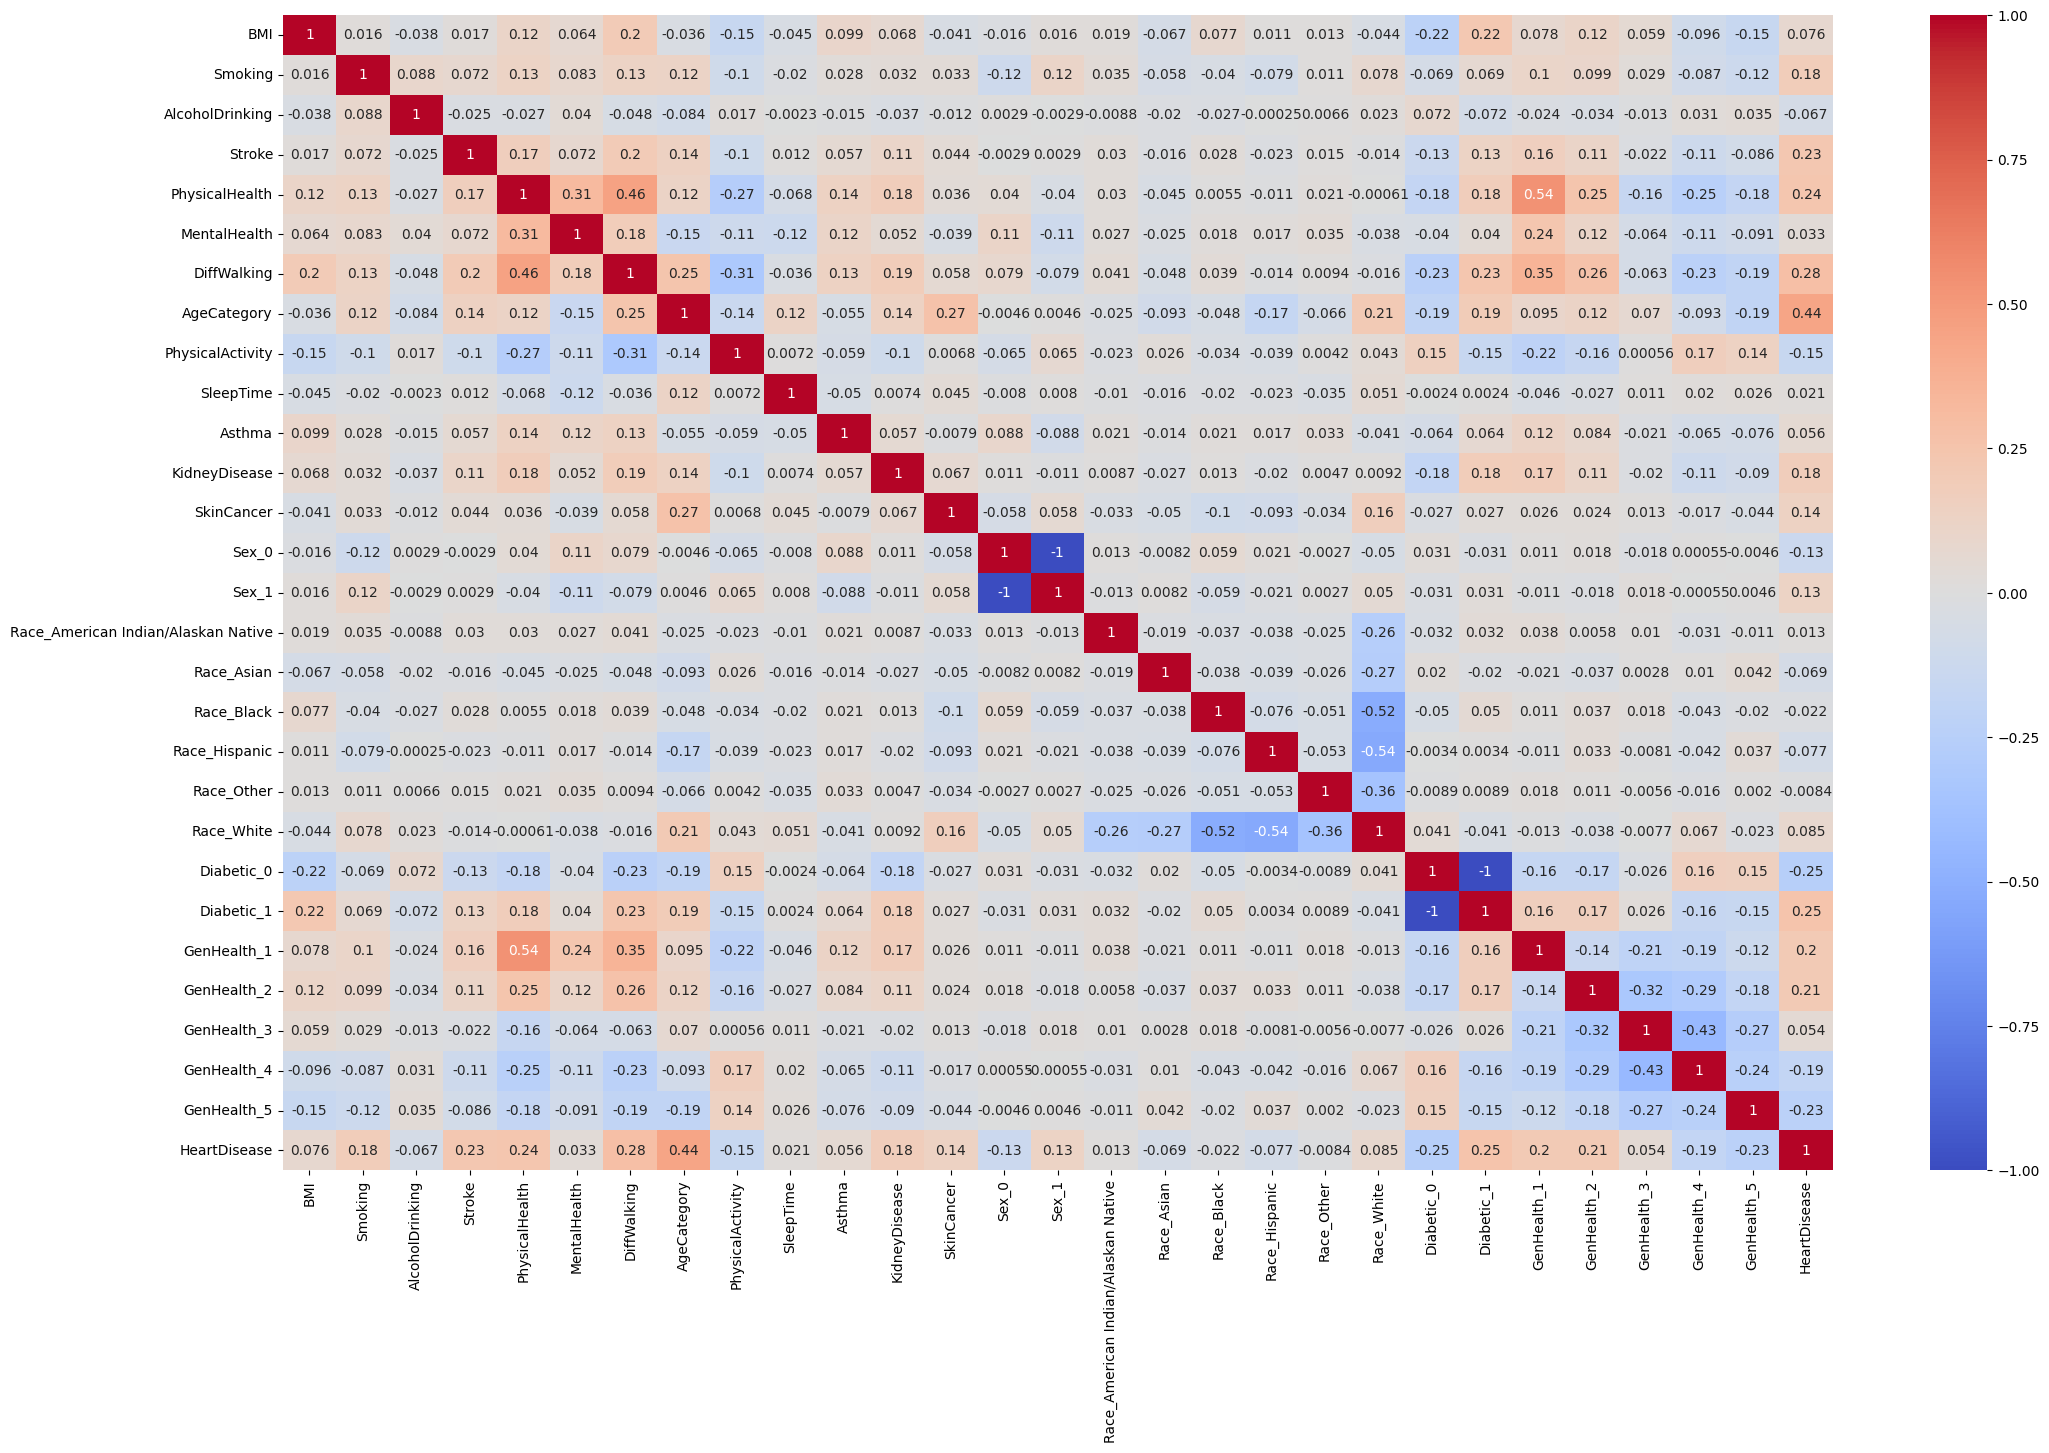

In [25]:
 plt.figure(figsize=(25, 15))
 correlation_matrix = data_set.corr()
 heatmap =sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
 plt.show()

<Axes: title={'center': 'Correlation with target'}>

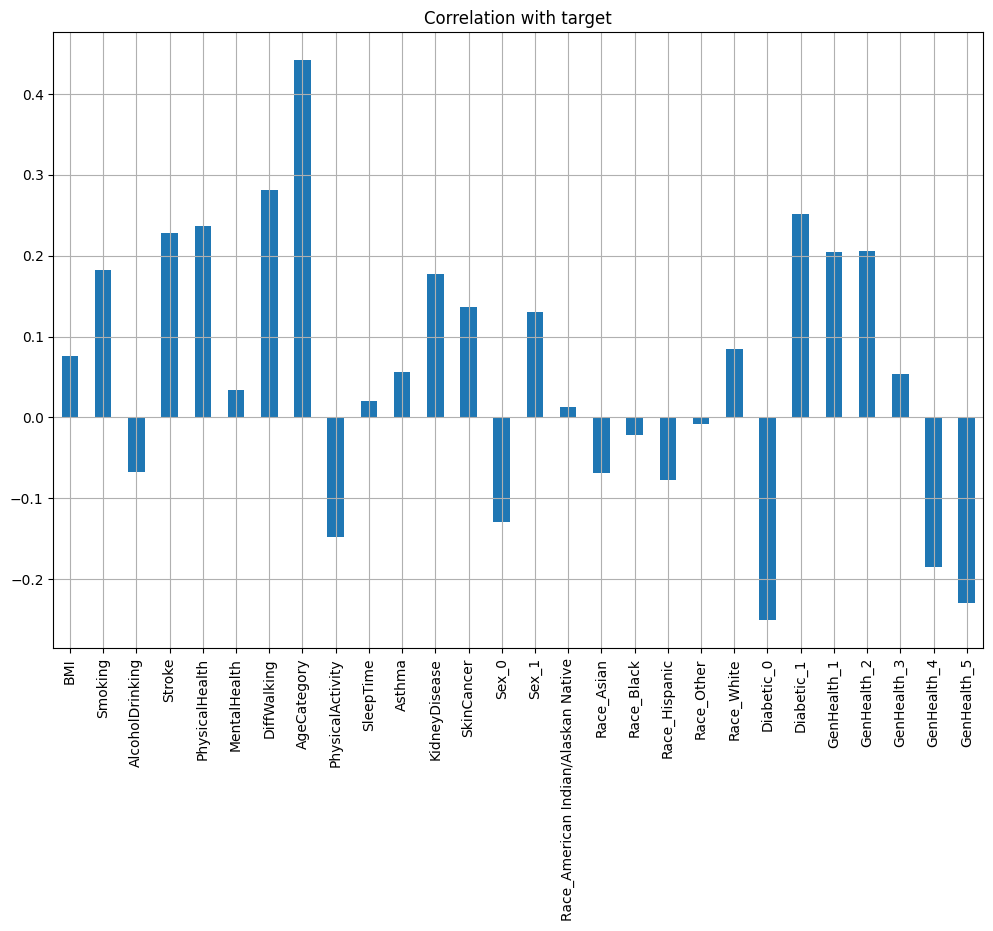

In [60]:
data_set.drop('HeartDisease', axis=1).corrwith(data_set.HeartDisease).plot(kind='bar', grid=True, figsize=(12, 8),
                                                      title="Correlation with target")

##### Remove underperforming features

In [61]:
data_set.drop(["GenHealth_1", "GenHealth_2", "GenHealth_3", "GenHealth_4", "GenHealth_5"], axis="columns", inplace=True)

<Axes: title={'center': 'Correlation with target'}>

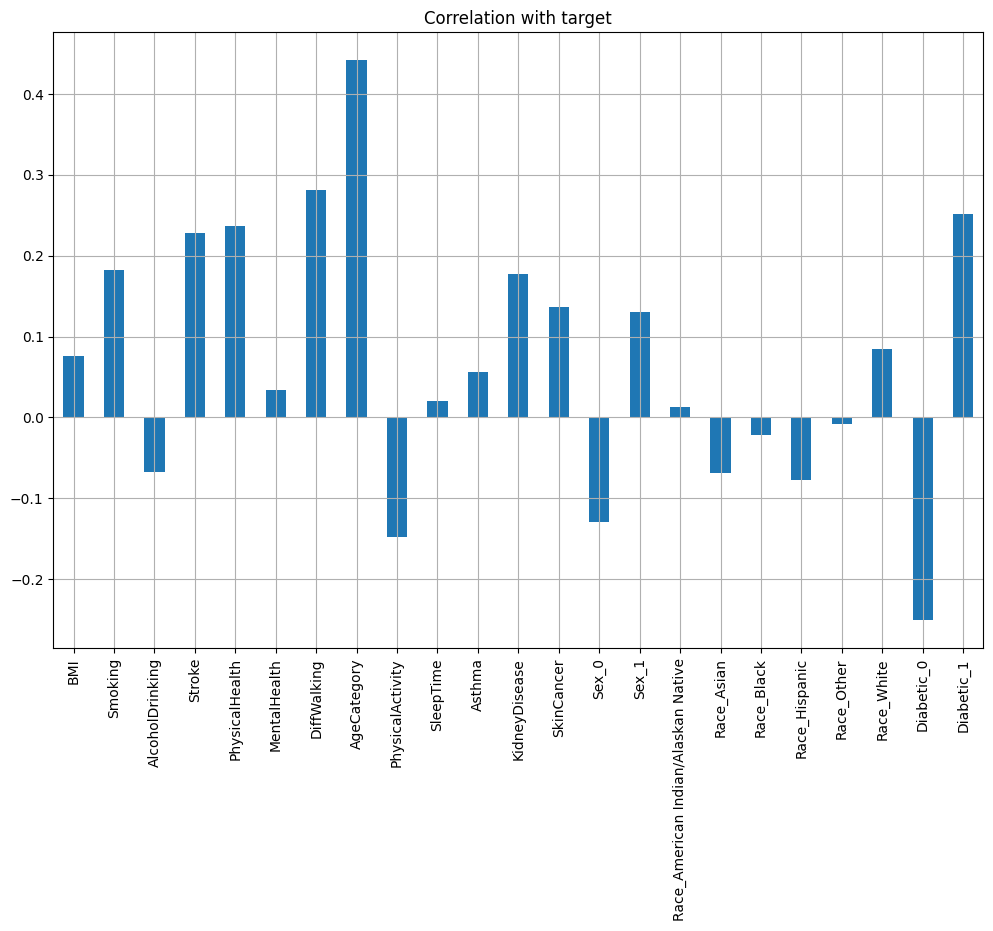

In [63]:
data_set.drop('HeartDisease', axis=1).corrwith(data_set.HeartDisease).plot(kind='bar', grid=True, figsize=(12, 8), 
                                            title="Correlation with target")

## Detect & remove outliers

In [29]:
num_data=[]
for i in data_set.columns:
    if data_set[i].dtype==float :
        num_data.append(i)
print(num_data)

['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime']


BMI                  Axes(0.125,0.11;0.133621x0.77)
PhysicalHealth    Axes(0.285345,0.11;0.133621x0.77)
MentalHealth       Axes(0.44569,0.11;0.133621x0.77)
AgeCategory       Axes(0.606034,0.11;0.133621x0.77)
SleepTime         Axes(0.766379,0.11;0.133621x0.77)
dtype: object

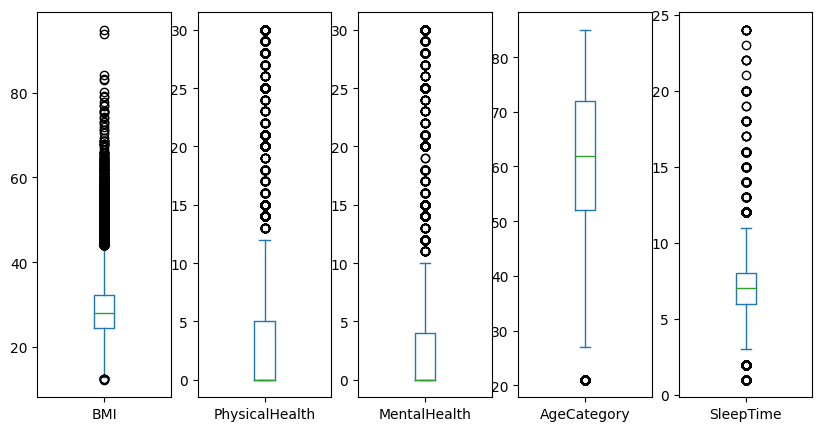

In [30]:
data_set[num_data].plot(kind = "box", figsize = (10,5), subplots = True)

In [31]:
Z_score= zscore(data_set[num_data])
Z_score

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime
311481,0.158610,-0.347421,-0.506976,1.365175,-0.679590
171098,-0.469030,-0.347421,-0.506976,-2.270263,0.554366
151394,0.780142,-0.447412,-0.506976,-0.225329,-0.062612
240390,-0.908837,-0.547403,-0.506976,0.342708,-0.062612
159498,-0.717948,-0.547403,1.811697,-2.270263,-0.062612
...,...,...,...,...,...
319765,1.456650,2.452327,1.232029,-0.225329,-0.679590
319767,1.114578,-0.547403,-0.506976,0.910745,0.554366
319781,1.253545,-0.547403,-0.506976,-1.361403,-0.062612
319786,0.654920,-0.547403,-0.506976,0.058689,0.554366


In [32]:
no_outliers = ((Z_score > -3.0) & (Z_score < 3.0)).all(axis=1)
no_outliers

311481    True
171098    True
151394    True
240390    True
159498    True
          ... 
319765    True
319767    True
319781    True
319786    True
319790    True
Length: 54522, dtype: bool

##### Values between -3 and 3 in z_score

In [33]:
clean_data_set =data_set[no_outliers]
clean_data_set

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,PhysicalActivity,SleepTime,...,Race_Other,Race_White,Diabetic_0,Diabetic_1,GenHealth_1,GenHealth_2,GenHealth_3,GenHealth_4,GenHealth_5,HeartDisease
311481,29.95,0,1,0,2.0,0.0,0,85.0,1,6.0,...,0,1,1,0,0,0,0,1,0,0
171098,25.84,0,0,0,2.0,0.0,0,21.0,0,8.0,...,0,0,1,0,0,0,1,0,0,0
151394,34.02,1,0,0,1.0,0.0,0,57.0,1,7.0,...,0,0,1,0,0,0,1,0,0,0
240390,22.96,1,0,0,0.0,0.0,0,67.0,0,7.0,...,0,1,1,0,0,0,1,0,0,0
159498,24.21,0,0,0,0.0,20.0,0,21.0,1,7.0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319765,38.45,0,0,1,30.0,15.0,1,57.0,1,6.0,...,0,0,0,1,1,0,0,0,0,1
319767,36.21,1,0,0,0.0,0.0,1,77.0,1,8.0,...,0,0,0,1,0,0,1,0,0,1
319781,37.12,1,0,0,0.0,0.0,0,37.0,1,7.0,...,0,0,1,0,0,0,0,1,0,1
319786,33.20,1,0,0,0.0,0.0,0,62.0,1,8.0,...,0,0,0,1,0,0,0,1,0,1


In [34]:
number_of_outliers=data_set.shape[0]-clean_data_set.shape[0]
number_of_outliers

1781

In [35]:
ratio_of_outliers=number_of_outliers/data_set.shape[0]
print(round(ratio_of_outliers*100,1))

3.3


In [36]:
x = clean_data_set.drop("HeartDisease", axis=1)
y = clean_data_set["HeartDisease"]

In [37]:
print(x.shape)
y.value_counts()

(52741, 28)


HeartDisease
0    26606
1    26135
Name: count, dtype: int64

In [38]:
over = RandomOverSampler(random_state=100)
x_new , y_new = over.fit_resample(x,y)

In [39]:
print(x_new.shape)
y_new.value_counts()

(53212, 28)


HeartDisease
0    26606
1    26606
Name: count, dtype: int64

In [40]:
x_train, x_temp, y_train, y_temp = train_test_split(x_new, y_new, test_size=0.2, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5)

In [41]:
model = LogisticRegression()
model.fit(x_train, y_train)
test_pred = model.predict(x_train)
test_acc = accuracy_score(y_train, test_pred)
test_acc

0.7594023820150814

In [42]:
valid_pred = model.predict(x_valid)
valid_acc = accuracy_score(y_valid, valid_pred)
valid_acc

0.7538056756248825

In [43]:
model = GaussianNB()
model.fit(x_train, y_train)
test_pred = model.predict(x_train)
test_acc = accuracy_score(y_train, test_pred)
test_acc

0.7126547487608353

In [44]:
valid_pred = model.predict(x_valid)
valid_acc = accuracy_score(y_valid, valid_pred)
valid_acc

0.7092651757188498

In [58]:
degree = 2
poly = PolynomialFeatures(degree=degree)
train_data_poly = poly.fit_transform(x_train)
valid_data_poly = poly.transform(x_valid)
test_data_poly = poly.transform(x_test)

model = LogisticRegression()
model.fit(train_data_poly, y_train)

test_pred = model.predict(test_data_poly)  # Predict on the test data, not train data
test_acc = accuracy_score(test_pred, y_test)  # Compare with test labels, not train labels

print("Test Accuracy:", test_acc)

Test Accuracy: 0.7641863960916948


In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
test_pred = model.predict(x_train)
test_acc = accuracy_score(y_train, test_pred)
test_acc

0.9982381545255937

In [ ]:
valid_pred = model.predict(x_valid)
valid_acc = accuracy_score(y_valid, valid_pred)
valid_acc

0.6682954331892501

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
test_pred = model.predict(x_train)
test_acc = accuracy_score(y_train, test_pred)
test_acc

In [ ]:
valid_pred = model.predict(x_valid)
valid_acc = accuracy_score(y_valid, valid_pred)
valid_acc